# Diabetes Prediction


#### Dataset URL: https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

When you hear the word “diabetes,” your first thought is likely about high blood sugar. Blood sugar is an often-underestimated component of your health. When it’s out of whack over a long period of time, it could develop into diabetes. Diabetes affects your body’s ability to produce or use insulin, a hormone that allows your body to turn glucose (sugar) into energy.
When you hear the word “diabetes,” your first thought is likely about high blood sugar. Blood sugar is an often-underestimated component of your health. When it’s out of whack over a long period of time, it could develop into diabetes. Diabetes affects your body’s ability to produce or use insulin, a hormone that allows your body to turn glucose (sugar) into energy. Here’s what symptoms may occur to your body when diabetes takes effect.

Diabetes can be effectively managed when caught early. However, when left untreated, it can lead to potential complications that include heart disease, stroke, kidney damage, and nerve damage.


#### Problem statement

 Using a dataset collected by National Institute of Diabetes and Digestive and Kidney Diseases as part of Pima Indians Diabetes Database. Predict if a person has diabetes or not.

In [64]:
#importing basic libraries for visualisations
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [88]:
#importing libraries to apply machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,roc_curve,auc,f1_score,precision_recall_curve

In [66]:
#glimpse of dataset we are going to use
diabetesdf=pd.read_csv('diabetes.csv')
diabetesdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Exploration

In [67]:
diabetesdf.shape
#dataset has 768 records under 10 headings

(768, 9)

In [68]:
# checking datatype of every column
diabetesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [69]:
diabetesdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [70]:
corr=diabetesdf.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


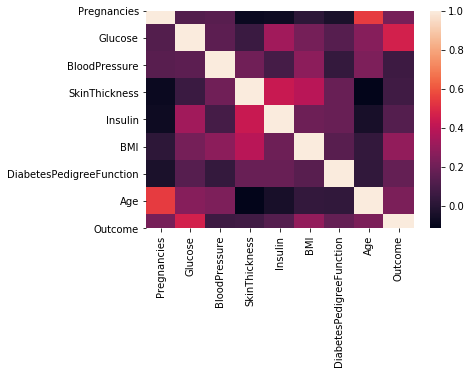

In [71]:
#lets see correlation in a easier form
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

### Data Visualisation  


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


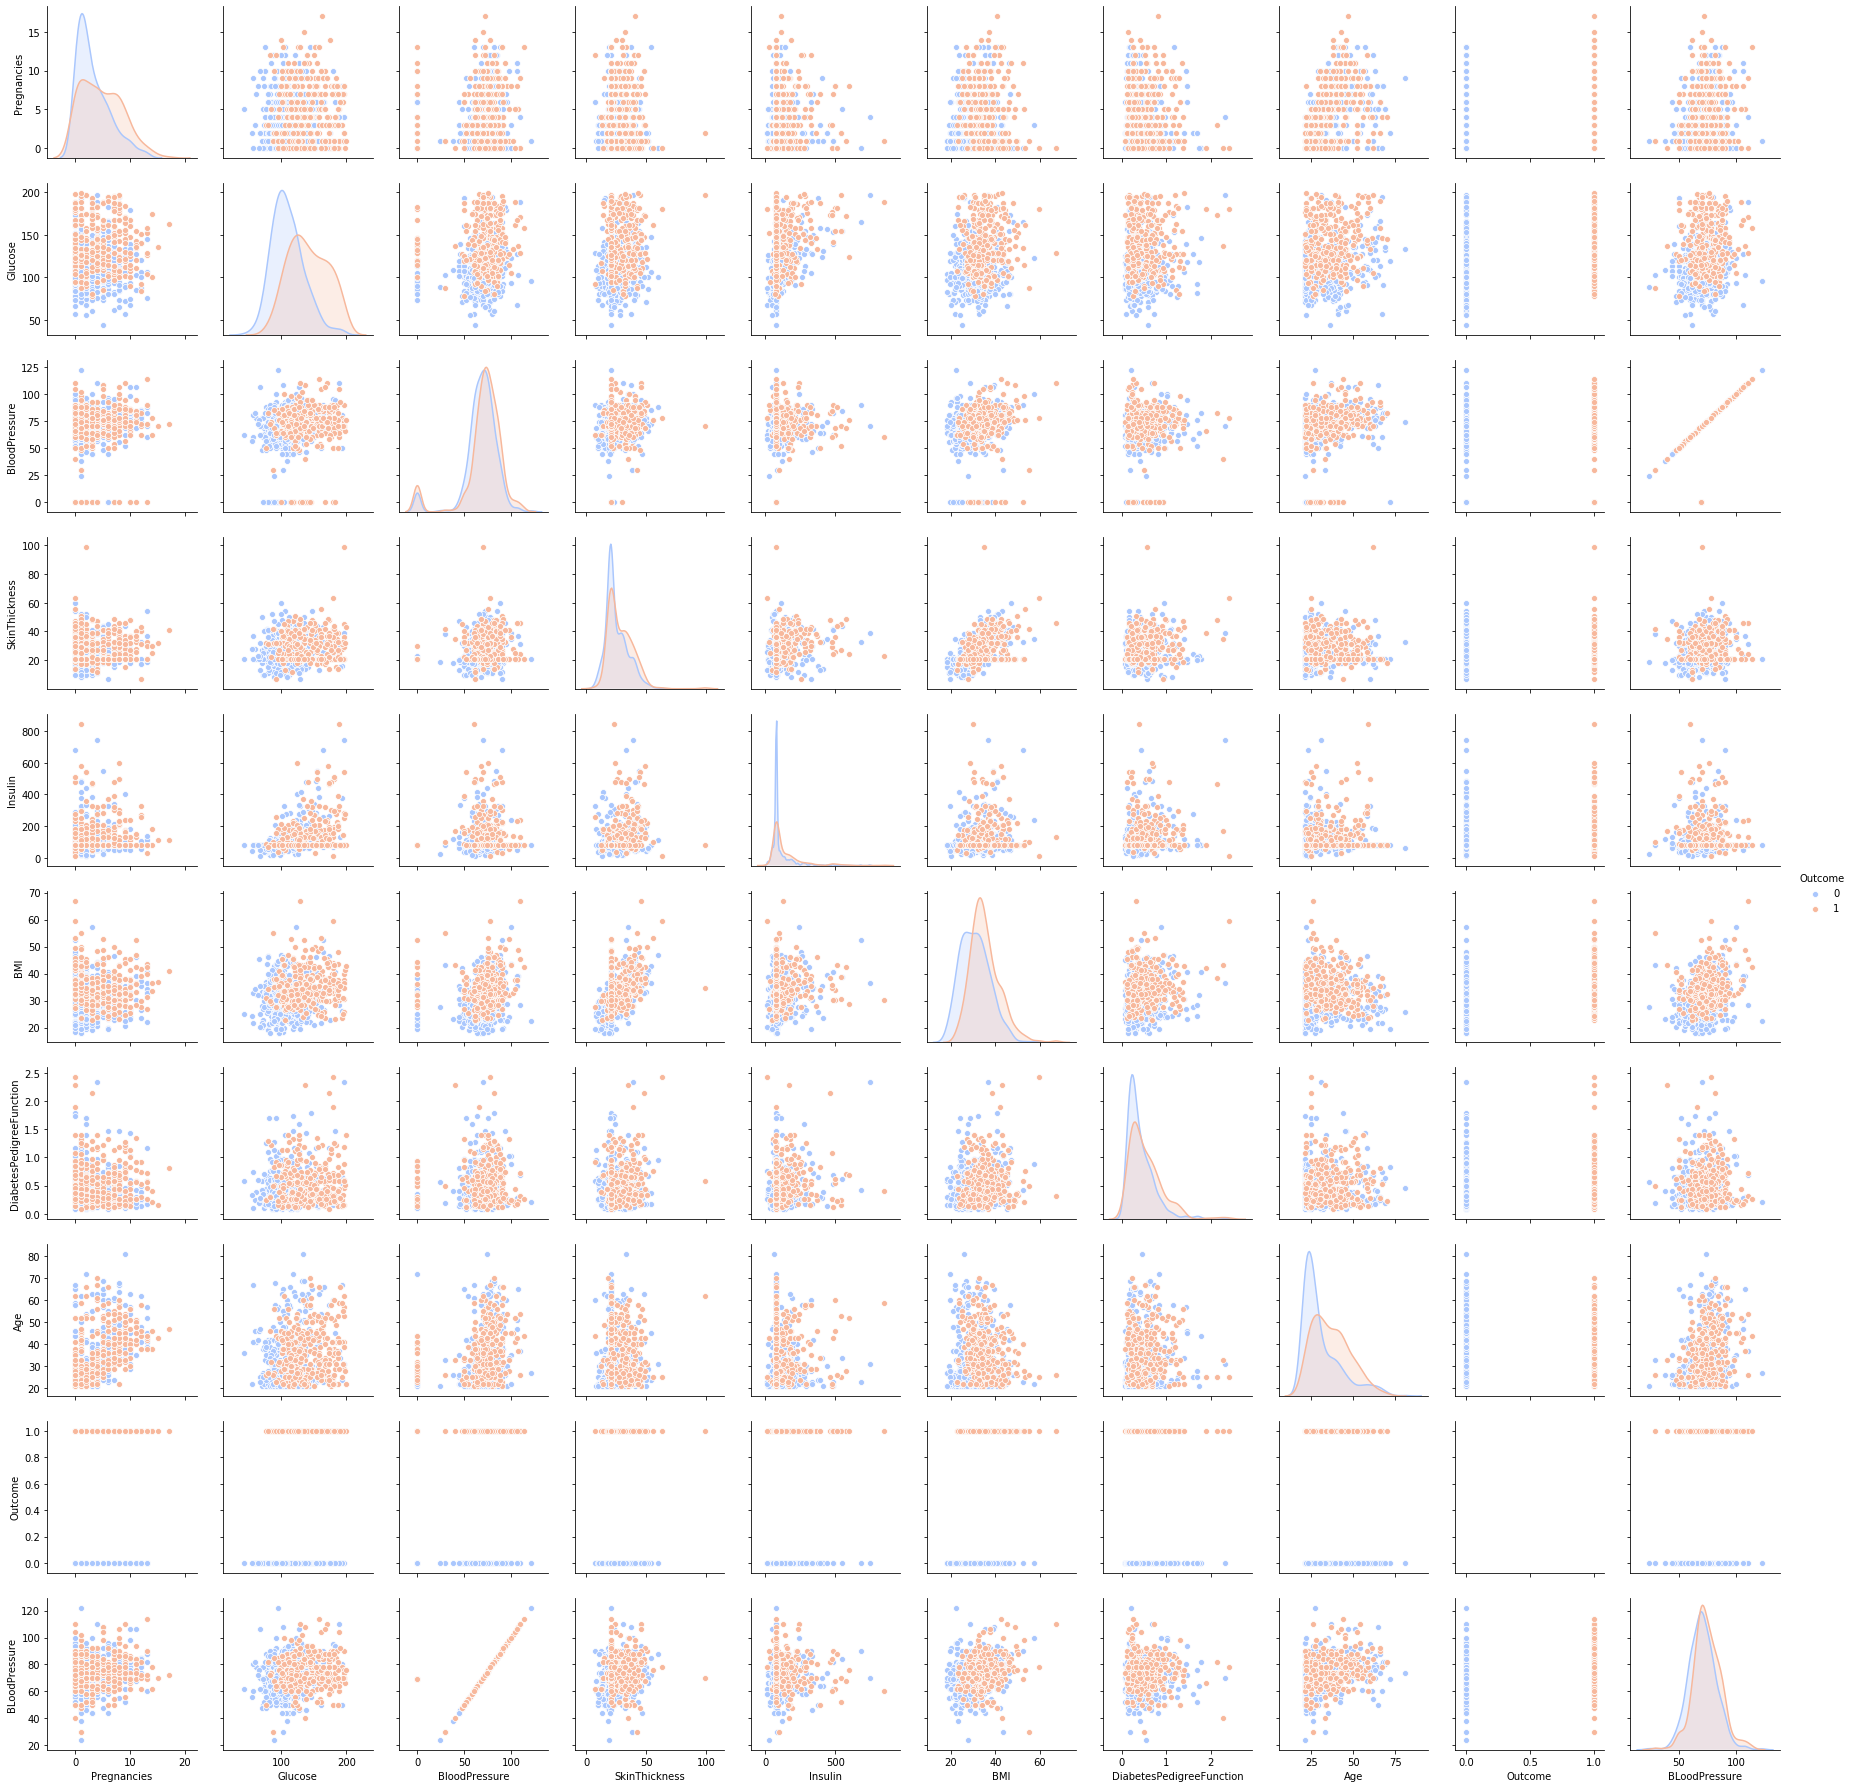

In [97]:
# Lets srt by making a pair plot
sns.pairplot(diabetesdf,hue='Outcome',palette='coolwarm')

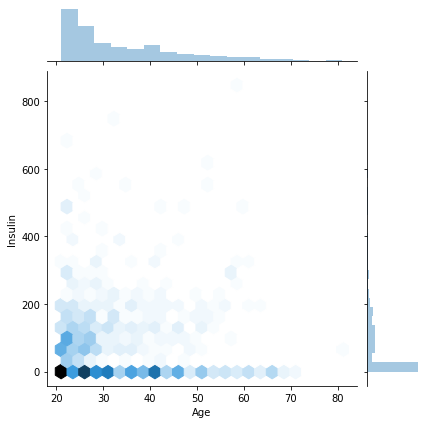

In [74]:
sns.jointplot(x='Age',y='Insulin',data=diabetesdf,kind='hex')

Scientifically speaking,there has been observed a general trend where in the insulin secrection aibility of human body decreases with increase in age


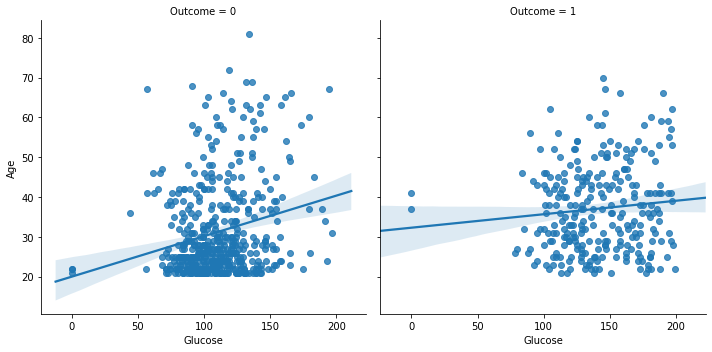

In [75]:
sns.lmplot(x='Glucose',y='Age',data=diabetesdf,col='Outcome')


It is observed that people having glucose level above 80 are tested possitive however there are cases when Glucose lelvel are greater than 80 but the person is not tested possitive.This lets us conclude that glucose is not only parameter for testing possitive for diabetes.

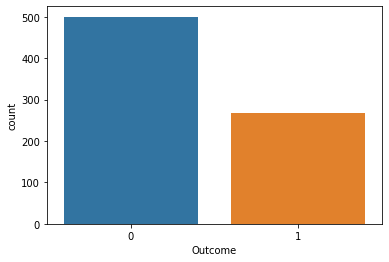

In [76]:
#checking dataset has how many true diabetes records
sns.countplot(x='Outcome',data=diabetesdf)
plt.show()

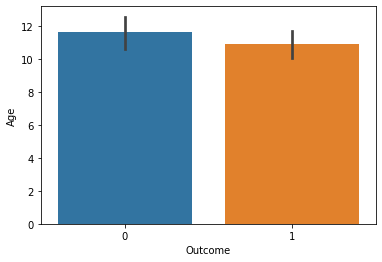

In [77]:
#Is diabetes age dependent ?
sns.barplot(x='Outcome',y='Age',data=diabetesdf,estimator=np.std)

##### After visualisizing the data properly, we can conclude that Having Diabetes depends on various factors .And no factor is highly dependent on one another 

### Data preprocessing

#### Checking for null values

In [78]:
#checking if we have any null values
diabetesdf.isnull().values.any()

False

In [79]:
#dataset doesnt have any NaN value ,but since it has many integer coloumns we could have 0 as null value
diabetesdf.isin([0]).any()

Pregnancies                  True
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

In [80]:
#replacing all 0 values in columns which should not have 0, with column mean
diabetesdf['BMI'] = diabetesdf['BMI'].replace(0, diabetesdf['BMI'].mean())  
diabetesdf['Glucose'] = diabetesdf['Glucose'].replace(0, diabetesdf['Glucose'].mean())
diabetesdf['Insulin'] = diabetesdf['Insulin'].replace(0, diabetesdf['Insulin'].mean())
diabetesdf['BLoodPressure'] = diabetesdf['BloodPressure'].replace(0, diabetesdf['BloodPressure'].mean())
diabetesdf['SkinThickness'] = diabetesdf['SkinThickness'].replace(0, diabetesdf['SkinThickness'].mean())  

#### Data Splitling in Trainng and Testing Data

In [81]:
#taking out outcomes seperately
outcome=diabetesdf['Outcome']
data=diabetesdf[diabetesdf.columns[:8]]
#splitting the data set in train and test
train,test=train_test_split(diabetesdf,test_size=0.25,random_state=0,stratify=diabetesdf['Outcome'])
train_x=train[train.columns[:8]]
test_x=test[test.columns[:8]]
#spliting outcomes according to above split
train_y=train['Outcome']
test_y=test['Outcome']
#train_x and train_y are training dataset. train_x has whole table whereas test_x has actual outcome.
# test_x and test_y is testing dataset.Test_y being the outcomes we need to get from our model.

In [82]:
#main training dataset
train_x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80.0,74,11.000000,60.000000,30.000000,0.527,22
453,2,119.0,0,20.536458,79.799479,19.600000,0.832,72
706,10,115.0,0,20.536458,79.799479,31.992578,0.261,30
606,1,181.0,78,42.000000,293.000000,40.000000,1.258,22
118,4,97.0,60,23.000000,79.799479,28.200000,0.443,22


In [83]:
# outcomes of training dataset
train_y.head()

432    0
453    0
706    1
606    1
118    0
Name: Outcome, dtype: int64

In [84]:
test_x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,2,106.0,64,35.000000,119.000000,30.5,1.400,34
565,2,95.0,54,14.000000,88.000000,26.1,0.748,22
390,1,100.0,66,29.000000,196.000000,32.0,0.444,42
736,0,126.0,86,27.000000,120.000000,27.4,0.515,21
587,6,103.0,66,20.536458,79.799479,24.3,0.249,29


In [85]:
test_y.head()

147    0
565    0
390    0
736    0
587    0
Name: Outcome, dtype: int64

#### Feature Scaling

In [86]:
#fitting standard scaler in our dataset it makes mean=0 and standard deviation=1
sc_X = StandardScaler()
train_x = sc_X.fit_transform(train_x)
test_x = sc_X.transform(test_x)

### Applying different models 

##### Logistic Regression

In [89]:
#applying model
log_reg= LogisticRegression()
#fitting model on training dataset
log_reg.fit(train_x,train_y)
#predicting values
predict_y=log_reg.predict(test_x)
# calculating basic metrics
lr_acc=metrics.accuracy_score(predict_y,test_y)
lr_pre=metrics.precision_score(predict_y,test_y)
lr_rec=metrics.recall_score(predict_y,test_y)
print('Accuracy =%.3f' % (lr_acc))
print('Precision =%.3f' % (lr_pre))
print('Recall =%.3f' % (lr_rec))

Accuracy =0.771
Precision =0.582
Recall =0.709


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion table
[[109  16]
 [ 28  39]]


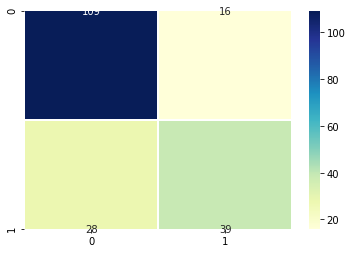

In [90]:
#making confusion matrix
cm = confusion_matrix(test_y,predict_y )
#enhancing the veiw
sns.heatmap(cm, annot=True, fmt="d",linewidths='.5',cmap="YlGnBu")
print("Confusion table")
print(cm)

##### Decision Tree

In [91]:
#fitting model to our dataset
dec_tree=DecisionTreeClassifier()
dec_tree.fit(train_x,train_y)
# making predictions
y_predict=dec_tree.predict(test_x)
#calculating basic metrics
dt_acc=metrics.accuracy_score(y_predict,test_y)
dt_pre=metrics.precision_score(y_predict,test_y)
dt_rec=metrics.precision_score(y_predict,test_y)
print('Accuracy =%.3f' % (dt_acc))
print('Precision =%.3f' % (dt_pre))
print('Recall =%.3f' % (dt_rec))

Accuracy =0.724
Precision =0.522
Recall =0.522


Confusion table: Decision tree
[[104  21]
 [ 32  35]]


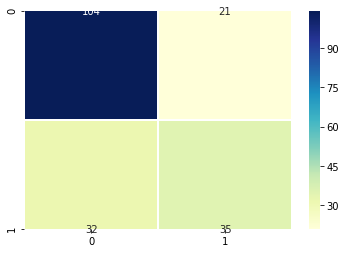

In [92]:
#making confusion matrix
cm = confusion_matrix(test_y,y_predict)
#enhancing the veiw
sns.heatmap(cm, annot=True, fmt="d",linewidths='.5',cmap="YlGnBu")
print("Confusion table: Decision tree")
print(cm)

We have used two models namely: decision tree and Logistic regression.
    
        Now, we will compare the two models to select the better fit for our dataset

### Comparing The models

#### ROC Curve

It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

True Positive Rate or sensitivity = True Positives / (True Positives + False Negatives)


False Positive Rate or inverted specificity = False Positives / (False Positives + True Negatives)

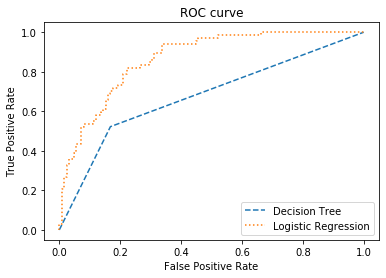

Decision Tree: ROC AUC=0.677
Logistic Regression: ROC AUC=0.867


In [93]:
# predict probabilities and keep probabilities for the positive outcome only
dt_probs = dec_tree.predict_proba(test_x)
dt_probs = dt_probs[:, 1]
lr_probs = log_reg.predict_proba(test_x)
lr_probs = lr_probs[:, 1]
# calculate scores
dt_auc = roc_auc_score(test_y, dt_probs)
lr_auc = roc_auc_score(test_y, lr_probs)
# calculate roc curves
dt_fpr, dt_tpr, _ = roc_curve(test_y, dt_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)
# plot the roc curve for the model
plt.title("ROC curve")
plt.plot(dt_fpr, dt_tpr, linestyle='--', label='Decision Tree')
plt.plot(lr_fpr, lr_tpr, linestyle=':', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
# summarize scores
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

#### Precision and recall curve

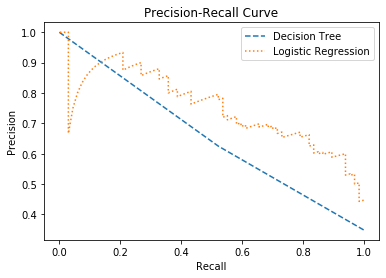

Logistic: f1=0.639 PR AUC=0.867
Decision Tree: f1=0.569 PR AUC=0.677


In [94]:
# predict class values
yhat1 = log_reg.predict(test_x)
yhat2 = dec_tree.predict(test_x)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(test_y, lr_probs)
dt_precision, dt_recall, _ = precision_recall_curve(test_y, dt_probs)
# calculate scores
lr_f1, lr_pauc = f1_score(test_y, yhat1), auc(lr_recall, lr_precision)
dt_f1, dt_pauc = f1_score(test_y, yhat2), auc(dt_recall, dt_precision)

# plot the precision-recall curves
plt.title("Precision-Recall Curve")
plt.plot(dt_recall, dt_precision, linestyle='--', label='Decision Tree')
plt.plot(lr_recall, lr_precision, linestyle=':', label='Logistic Regression')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
# summarize scores
print('Logistic: f1=%.3f PR AUC=%.3f' % (lr_f1, lr_auc))
print('Decision Tree: f1=%.3f PR AUC=%.3f' % (dt_f1, dt_auc))

## Conclusion

#### To summarise the comparison mesures

In [95]:
#making table for all metrics
table = [["Accuracy",lr_acc,dt_acc],["Precision",lr_pre,dt_pre],["Recall",lr_rec,dt_rec],["ROC AUC",lr_auc,dt_auc],["F1 score",lr_f1,dt_f1],["PR AUC",lr_pauc,dt_pauc]]
headers = ["Metric   ","Logistic Regression  ", "  Decision Tree   "]
#table formatting
print("                    Full Comparison Table            ")
print()
print(tabulate(table, headers, tablefmt="simple",colalign=("left","right","right"),floatfmt=(".3f", ".3f",".3f")))

                    Full Comparison Table            

Metric         Logistic Regression        Decision Tree
-----------  -----------------------  --------------------
Accuracy                       0.771                 0.724
Precision                      0.582                 0.522
Recall                         0.709                 0.522
ROC AUC                        0.867                 0.677
F1 score                       0.639                 0.569
PR AUC                         0.753                 0.657


        Looking at all measures, Logistic measure is a better fit for our prediction

Here the logistic regression help us derive the significance of the features,which decison tree was unable to
however, we can not rely on LR when in comes to categorical values

### THANK YOU!!